In [2]:
import json

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [3]:
d = json.load(open('data/MPD/mpd.slice.0-999.json', 'r'))
df_mpd = pd.DataFrame.from_dict(d['playlists'], orient='columns')
df_mpd.shape

(1000, 12)

# Inspect the Million Playlist Dataset "slice"

In [4]:
df_mpd.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,"[{'pos': 0, 'artist_name': 'Survivor', 'track_...",5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,"[{'pos': 0, 'artist_name': 'Hoody', 'track_uri...",18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,"[{'pos': 0, 'artist_name': 'Camille Saint-Saën...",4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,"[{'pos': 0, 'artist_name': 'The Smashing Pumpk...",7,4335282,16,NaN


In [5]:
df_mpd.dtypes

name             object
collaborative    object
pid               int64
modified_at       int64
num_tracks        int64
num_albums        int64
num_followers     int64
tracks           object
num_edits         int64
duration_ms       int64
num_artists       int64
description      object
dtype: object

In [6]:
df_mpd.describe()

,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists
count,1000.000000,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,499.500000,1.476247e+09,67.50300,50.526000,2.583000,17.546000,1.574061e+07,38.746000
std,288.819436,3.719567e+07,55.00334,41.448997,32.813501,20.978751,1.290575e+07,31.245091
min,0.000000,1.322611e+09,5.00000,2.000000,1.000000,2.000000,1.002971e+06,3.000000
25%,249.750000,1.459944e+09,25.00000,19.000000,1.000000,4.000000,5.810390e+06,16.000000
50%,499.500000,1.491048e+09,50.00000,38.000000,1.000000,10.000000,1.163116e+07,30.000000
75%,749.250000,1.505779e+09,92.50000,70.000000,1.250000,22.000000,2.181915e+07,53.000000
max,999.000000,1.509494e+09,245.00000,225.000000,1038.000000,178.000000,5.781713e+07,175.000000


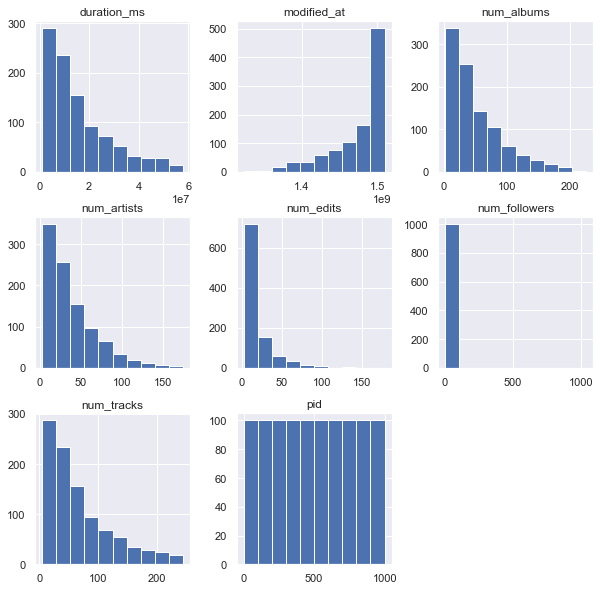

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
df_mpd.hist(ax=ax)
plt.show()

# Look at Playlist Artist Groupings

We look at the artists that appear on the most "popular" playlists, where popularity is defined as the number of followers. 

In [8]:
df_top = df_mpd.nlargest(9, ['num_followers']) 
df_top

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
765,Tangled,false,765,1499040000,81,37,1038,"[{'pos': 0, 'artist_name': 'Mandy Moore', 'tra...",15,15112167,59,NaN
255,Christmas Mix,false,255,1387152000,32,28,22,"[{'pos': 0, 'artist_name': 'Neko Case', 'track...",3,6772221,25,NaN
241,Tegan and Sara,false,241,1464998400,151,25,18,"[{'pos': 0, 'artist_name': 'Tegan and Sara', '...",17,29003627,7,NaN
539,July 2013,false,539,1373932800,28,28,17,"[{'pos': 0, 'artist_name': 'M83', 'track_uri':...",12,6360096,28,NaN
365,Chill Rock,false,365,1460332800,128,114,15,"[{'pos': 0, 'artist_name': 'alt-J', 'track_uri...",18,29409896,90,NaN
516,smooth jams,false,516,1509062400,188,171,13,"[{'pos': 0, 'artist_name': 'Boyz II Men', 'tra...",41,48588746,140,NaN
296,Worship,false,296,1508198400,35,31,11,"[{'pos': 0, 'artist_name': 'Tenth Avenue North...",19,8320641,26,NaN
223,classics,false,223,1505692800,120,106,10,"[{'pos': 0, 'artist_name': 'Elton John', 'trac...",37,29870133,76,NaN
231,Everything,false,231,1505001600,229,80,9,"[{'pos': 0, 'artist_name': 'Bring Me The Horiz...",45,52092271,40,NaN


In [9]:
def plot_popular_artists(df, ax):
    artist_list = df.artist_name
    Artists = {artist:0 for artist in artist_list.unique()}

    for a in artist_list:
        Artists[a] += 1

    popular_artists = sorted(list(Artists.items()), key=lambda x: x[1], reverse=True)[:20]
    labels, counts = zip(*popular_artists)

    ax.barh(list(range(len(counts))), counts, tick_label=labels)

In [10]:
row_tracks = [row[1].tracks for row in df_top.iterrows()]
len(row_tracks)
top_tracks_dfs = [pd.DataFrame.from_dict(rtrack, orient='columns') for rtrack in row_tracks]

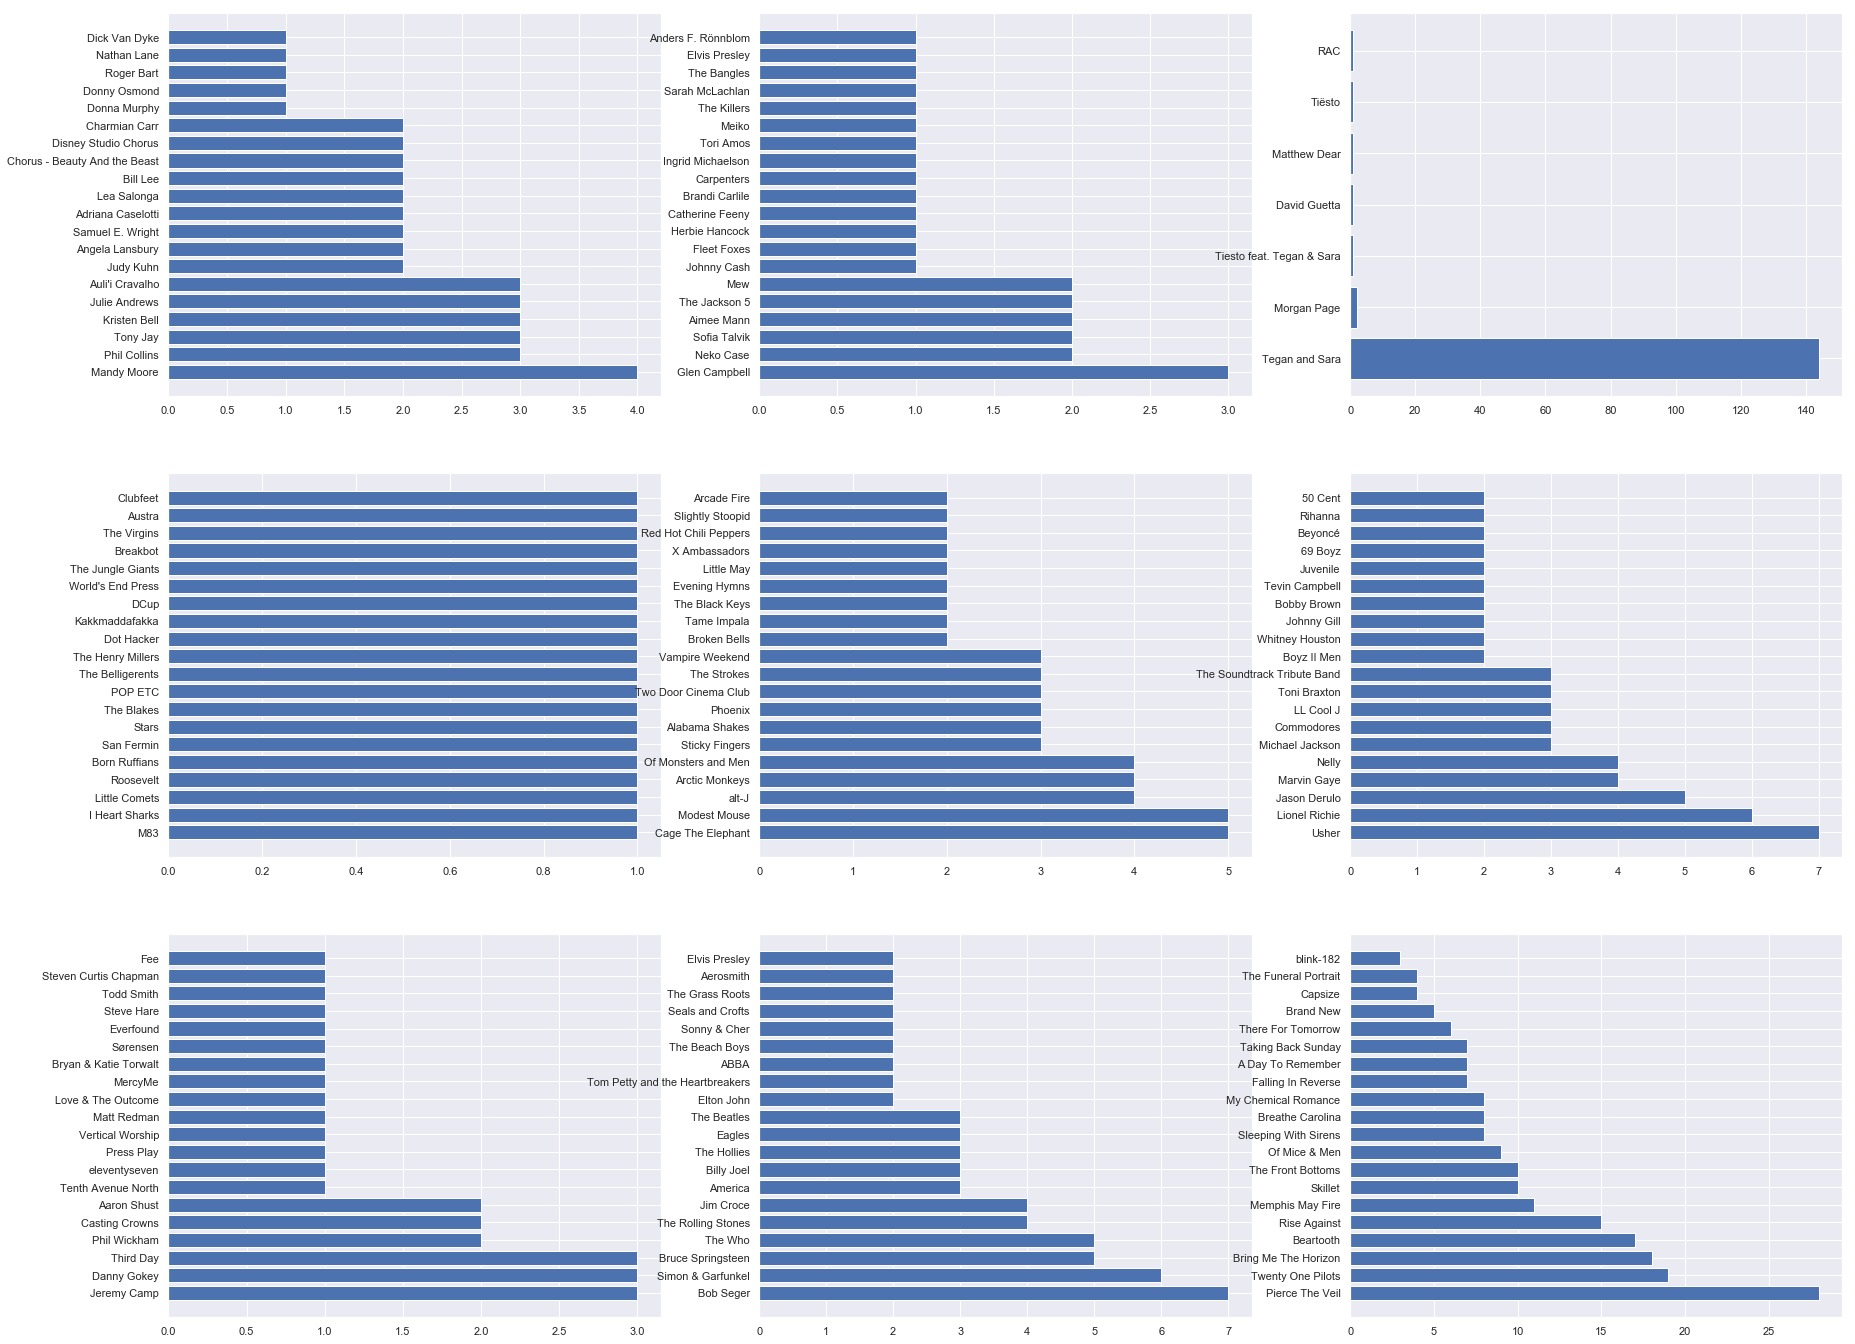

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(30, 24))
for ax, df in zip(axs.reshape(-1), top_tracks_dfs):  
    plot_popular_artists(df, ax)